## DDA3020 Autumn 2023 Homework 1 

### Programming Part 2：Linear Regression

**student ID: 121090429**

**The code requires approximately 3 minutes to execute.**

--------------------------------------------------------------------------------------------------------------------------

### 1. Dataset Preprocessing

In [312]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set a fixed random seed for reproducibility
np.random.seed(55)

current_directory = os.getcwd() # get the current directory
file_name = "Regression.csv"
file_path = os.path.join(current_directory, file_name)


df = pd.read_csv(file_path)
df.drop(['station','Date'], axis = 1) # delete the first two attributes


X = df.iloc[:, 2:23].values  # Attributes 3-23 as X (independent variables)
y = df.iloc[:, 23:25].values # Attributes 24-25 as y (dependent variables)


# Data pre-processing: delete NaN values' corresponding indices
valid_indices = ~np.isnan(X).any(axis=1) & ~np.isnan(y).any(axis=1)
X = X[valid_indices]
y = y[valid_indices]

# Data pre-processing: data normalization
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

X_normalized, mean_x, std_x = normalize_data(X)
y_normalized, mean_y, std_y = normalize_data(y)


### 2. Linear regression implementation


In [313]:
repeat_time = 10
training_rmse = []
testing_rmse = []
error_set = []

# Denormalization
def denormalize_data(normalized_data, mean, std):
    denormalized_data = normalized_data * std + mean
    return denormalized_data


# Use gradient descent method to obtain parameters of linear regression

alpha = 0.0000001   # alpha: learning rate
t = 10000   # t: iteration times

error_train_iteration = []
error_test_iteration = []

for i in range(repeat_time):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=i)
    X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train), axis=1) # add the constant vector
    X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test), axis=1)
    
    w = np.zeros((X_train.shape[1], y_train.shape[1])) # set initial w
    test_error = []
    train_error = []
    for iteration in range(t):
        y_train_hat = X_train.dot(w)
        gradient = X_train.T.dot(y_train_hat - y_train)
        y_test_hat = X_test.dot(w)
        tra_error = np.sqrt(np.mean((y_train_hat - y_train)**2))
        tes_error = np.sqrt(np.mean((y_test_hat - y_test)**2))
        train_error.append(tra_error)
        test_error.append(tes_error)
        w = w-alpha*gradient
        
    
    y_train_pred = np.dot(X_train,w)
    y_test_pred = np.dot(X_test,w)
    
    y_train_pred_denormalized = denormalize_data(y_train_pred, mean_y, std_y)
    y_test_pred_denormalized = denormalize_data(y_test_pred, mean_y, std_y)
    
    train_rmse = np.sqrt(np.mean((y_train_pred_denormalized - denormalize_data(y_train, mean_y, std_y)) ** 2))
    test_rmse = np.sqrt(np.mean((y_test_pred_denormalized - denormalize_data(y_test, mean_y, std_y)) ** 2))

    training_rmse.append(train_rmse)
    testing_rmse.append(test_rmse)
    error_train_iteration.append(train_error)
    error_test_iteration.append(test_error)

### 3. Hyperparameter setting

Here we set the learning rate $\alpha = 0.0000001$ and the number of iterations $t = 10000$, which are shown in the gradient descent function above.

### 4. Results

In [314]:
# Print RMSE for each trial
for i in range(repeat_time):
    print("Trial:",i+1)
    print("Training RMSE:", training_rmse[i])
    print("Testing RMSE:", testing_rmse[i])
    print("\n")

# Calculate and print the average RMSE for training and testing sets
avg_training_rmse = np.mean(training_rmse)
avg_testing_rmse = np.mean(testing_rmse)
print("Average Training RMSE:", avg_training_rmse)
print("Average Testing RMSE:", avg_testing_rmse)


Trial: 1
Training RMSE: 1.276163947153217
Testing RMSE: 1.2394362559575889


Trial: 2
Training RMSE: 1.2778429897774426
Testing RMSE: 1.2285509560064034


Trial: 3
Training RMSE: 1.2678043127472771
Testing RMSE: 1.2737874930463478


Trial: 4
Training RMSE: 1.2688022155440069
Testing RMSE: 1.2683214182798628


Trial: 5
Training RMSE: 1.2678636016181104
Testing RMSE: 1.274599729874369


Trial: 6
Training RMSE: 1.275101684107228
Testing RMSE: 1.2413969672699434


Trial: 7
Training RMSE: 1.267451445170221
Testing RMSE: 1.2802149238541622


Trial: 8
Training RMSE: 1.2697912544222327
Testing RMSE: 1.2631894090257343


Trial: 9
Training RMSE: 1.2714018615402156
Testing RMSE: 1.257710887725738


Trial: 10
Training RMSE: 1.2708968173044073
Testing RMSE: 1.2609648119944152


Average Training RMSE: 1.2713120129384359
Average Testing RMSE: 1.2588172853034565


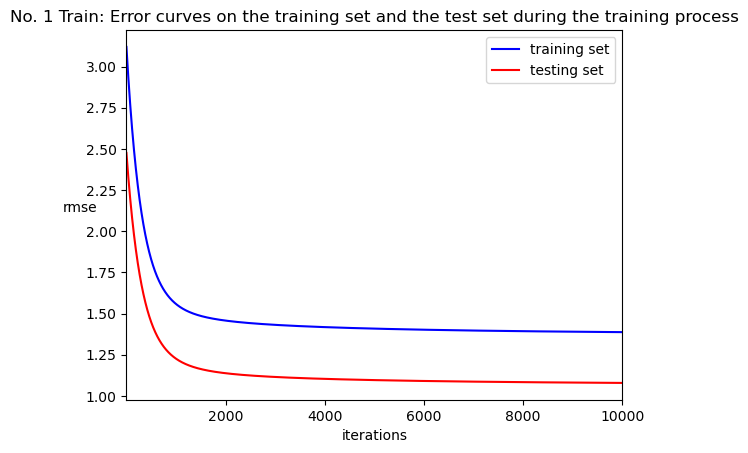

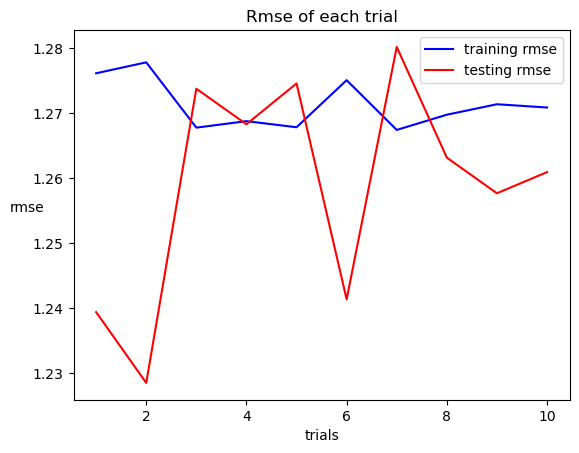

In [315]:
# Plot

# Plot1: Error curves on the training set and the test set during the training process
# Here we only show how the error changes w.r.t the training process in the first trial

x = range(1, t + 1)
y1 = np.array(error_train_iteration[0]) * list(std_y)[0]
y2 = np.array(error_test_iteration[0]) * list(std_y)[1]

plt.figure()
plt.plot(x, y1, color='blue', label='training set')
plt.plot(x, y2, color='red', label='testing set')
plt.xlim(1, t)  # Set the x-axis limits
plt.xlabel("iterations")
plt.ylabel("rmse", rotation = 0)
plt.title("No. 1 Train: Error curves on the training set and the test set during the training process")
plt.legend()
plt.show()


# Plot2: Rmse of each trial
plt.figure()
plt.plot(list(np.arange(1,repeat_time+1,1)),training_rmse, color = 'blue', label = 'training rmse')
plt.plot(list(np.arange(1,repeat_time+1,1)),testing_rmse, color = 'red', label = 'testing rmse')
plt.xlabel("trials")
plt.ylabel("rmse", rotation = 0)
plt.title('Rmse of each trial')
plt.legend()
plt.show()


### 5. Discussion

 1. The impact of hyperparameters:

    (1) Learning rate $\alpha$: $\alpha$ determines the step size for updating the model's parameters during training. If the learning rate is set too high, it can lead to overshooting the optimal weights and make the training process diverge. The algorithm may fail to converge, and you might observe a loss that keeps increasing. If the learning rate is set too low, the model's convergence may be very slow, and it could get stuck in a suboptimal local minimum. Training can be time-consuming, and it might not reach the best possible solution within a reasonable timeframe.

    (2) Iteration: When the number of iteration is too small, it will fails to could get stuck in a suboptimal local minimum. But when the number of iteration is too large, the regression can be very time-consuming.
    
    
    

 2. The Impact of Data Preprocessing Methods:

    (1) First we remove the missing value (NaN) in the dataset, which assure the accuracy of the model because linear regression models can be sensitive to missing data.
    
    (2) Then we do the normalization of the data, which helps ensure that all features are on a similar scale to accelerate convergence and enhance the model's stability.
    
    

 3. Gradient descent is used in the regression because $d$ is large.
 
 4. RMSE tends to decrease with iteration.
